### This is an ARX implementation of the control-oriented model

<hr id="toc">


In this scrip, I will go through the essential exploratory analysis steps:
1. [Read Data](#Read_Data)
2. [Visualization](#Visualization)
3. [ARX](#Construct_ARX_models)

  3.1. [FeatureEngineering](#Feature_Engineering)

**Further research**
1. Multi-output regression

In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import numpy as np
import datetime,time
%matplotlib inline

In [9]:
workingPath = r"C:\Users\Fan\OneDrive - tongji.edu.cn\Project_in_UA\Fan' file\2_UA_Project\ProjectFenestration\2_Model\Control_Oriented_Model\Data"

<br id="Read_Data">

### read data
#### Initial Data

<br>
Read data from originald data file, which are not record in even time intervel

In [3]:
FileName = "Winter_Sou_Month.csv"
FileName = "Winter_Nor_Month.csv"
FileName = "Winter_Wes_Month.csv"
FileName = "Winter_Eas_Month.csv"

#### Q: are all time interval smaller than 10s??

In [4]:
def test_max_time_interval(data_Index):
    # This function is used to test if the max time interval is 10
    time_interval = np.array(data_Index[1:])-np.array(data_Index[:-1])
    max_time_interval = max(time_interval)
    print(pd.DataFrame({"data":time_interval}).describe())
    plt.hist(time_interval)
    return max_time_interval,max_time_interval==10

In [5]:
def test_max_time_interval(data):
    # This function is used to test if the max time interval is 10
    time_interval = np.array(data.iloc[1:,0])-np.array(data.iloc[:-1,0])
    max_time_interval = max(time_interval)
    print(pd.DataFrame({"data":time_interval}).describe())
    plt.hist(time_interval)
    return max_time_interval,max_time_interval==10

##### Read weather data

In [10]:
Weather_Data = pd.read_csv(workingPath+"\\WeatherData.csv",index_col=0,parse_dates = True)
Weather_Data.head()

,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Date,,,,,,,,,,
1970-01-01 00:00:00,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 01:00:00,-11.7,-15.6,73,99600,0,0,227,0,0,0
1970-01-01 02:00:00,-11.1,-15.0,73,99500,0,0,230,0,0,0
1970-01-01 03:00:00,-11.1,-15.0,73,99500,0,0,230,0,0,0
1970-01-01 04:00:00,-10.6,-14.4,73,99500,0,0,232,0,0,0


In [11]:
Weather_Data.tail()

,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Date,,,,,,,,,,
1970-12-31 19:00:00,-1.1,-2.8,89,97800,0,0,279,0,0,0
1970-12-31 20:00:00,-3.9,-6.7,81,98000,0,0,264,0,0,0
1970-12-31 21:00:00,-4.4,-7.2,81,98100,0,0,262,0,0,0
1970-12-31 22:00:00,-5.0,-8.3,78,98200,0,0,258,0,0,0
1970-12-31 23:00:00,-6.1,-8.9,81,98300,0,0,253,0,0,0


In [12]:
Weather_Data_resampled = Weather_Data.resample("10s").ffill()
Weather_Data_resampled.head()

,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Date,,,,,,,,,,
1970-01-01 00:00:00,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 00:00:10,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 00:00:20,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 00:00:30,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 00:00:40,-12.2,-16.1,73,99500,0,0,218,0,0,0


#### data preprocessing: transform the data into evenly sampled

In [23]:
## re_read data
data_with_Timestamps = pd.read_csv(workingPath+"\\One_Month.csv",parse_dates =[0], 
                                   date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x)))
                                   ,index_col=[0])
#data_with_Timestamps =data_with_Timestamps.iloc[:4,:]

In [14]:
data_with_Timestamps.head()

,TSupEas.T,flo.temAirEas.T,VSupEas_flow.V_flow
Time,,,
1970-01-01 00:00:00,293.1500,293.15000,2.560000e-13
1970-01-01 00:00:05,293.1893,293.13050,2.299930e-04
1970-01-01 00:00:05,293.1893,293.13050,2.299930e-04
1970-01-01 00:00:18,293.2905,293.08127,2.298680e-04
1970-01-01 00:00:18,293.2905,293.08127,2.298680e-04


In [24]:
## drop duplciates, and back fill nan
data_with_Timestamps = data_with_Timestamps.drop_duplicates().bfill()

In [ ]:
data_with_Timestamps.shape

In [21]:
data_with_Timestamps.head()

,TSupEas.T,flo.temAirEas.T,VSupEas_flow.V_flow
Time,,,
1970-01-01 00:00:00,293.15000,293.15000,2.560000e-13
1970-01-01 00:00:05,293.18930,293.13050,2.299930e-04
1970-01-01 00:00:18,293.29050,293.08127,2.298680e-04
1970-01-01 00:00:26,293.35693,293.05000,2.298670e-04
1970-01-01 00:00:30,293.38022,293.03928,2.298670e-04


In [22]:
data_with_Timestamps.tail()

,TSupEas.T,flo.temAirEas.T,VSupEas_flow.V_flow
Time,,,
1970-01-10 07:02:00,303.60013,297.24164,0.234188
1970-01-10 07:03:00,312.26218,297.44183,0.236014
1970-01-10 07:04:00,309.76400,297.46262,0.238029
1970-01-10 07:04:06,311.53640,297.47260,0.238240
1970-01-10 07:05:00,311.93488,297.55444,0.240226


In [25]:
data_with_Timestamps_resampled = data_with_Timestamps.iloc[0:1,:].append(data_with_Timestamps.iloc[1:,:].resample("10T",label ="right").mean())

In [26]:
data_with_Timestamps.shape

(100837, 3)

In [27]:
data_with_Timestamps_resampled.shape

(4466, 3)

In [198]:
data_with_Timestamps_resampled = data_with_Timestamps_resampled.bfill()

In [199]:
data_with_Timestamps_resampled.head()

,TSupEas.T,flo.temAirEas.T,VSupEas_flow.V_flow
Time,,,
1970-01-01 00:00:00,293.15000,293.150000,2.560000e-13
1970-01-01 00:00:10,293.18930,293.130500,2.299930e-04
1970-01-01 00:00:20,293.29050,293.081270,2.298680e-04
1970-01-01 00:00:30,293.35693,293.050000,2.298670e-04
1970-01-01 00:00:40,293.40205,293.029447,2.298667e-04


In [200]:
data_with_Timestamps_resampled.tail()

,TSupEas.T,flo.temAirEas.T,VSupEas_flow.V_flow
Time,,,
1970-01-10 07:04:30,311.93488,297.55444,0.240226
1970-01-10 07:04:40,311.93488,297.55444,0.240226
1970-01-10 07:04:50,311.93488,297.55444,0.240226
1970-01-10 07:05:00,311.93488,297.55444,0.240226
1970-01-10 07:05:10,311.93488,297.55444,0.240226


<br id ='Visualization'>

### Visualize the data before constructing models

In [177]:
from pandas.plotting import autocorrelation_plot

KeyboardInterrupt: 

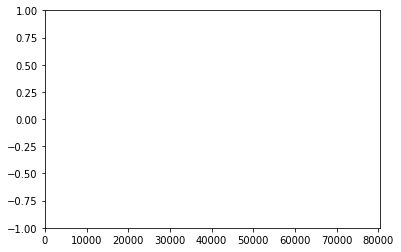

In [150]:
autocorrelation_plot(data_with_Timestamps_resampled.iloc[:,1])

#### Clearly, there is strong seasonality

<br id="Construct_ARX_models">

### construct ARX models 

<br id="Feature_Engineering">

#### Feature Engineering
```flow
 Feature generation --> Feature Selection --> Model fitting 
```

Feature Generation
  * Category 1:
     * History data(Autoregressive term)
         1. t-10s, t-20s, t-30s, ...,t-60s,
         2. t-1min, t-2min, t-3min,
         3. t-1hr, t-12hr,t-24hr
     * Exogenous variables
     
| Items| Type  |
|:------:|------|
|1. Outdoor air temperature|numerical|
|2. Solar radiation|numerical|       
|3. Occupant| Categorical(binary)|
|4. Equipment|numerical|
|5. Lighting|numerical|
|6. Supply air temperature|numerical|
|7. Supply air flowrate    |numerical|

         

In [29]:
## Some Global Variables
TimeInterval = 10
PredictionHorizon = 24*3600

##### Feature Generation

In [28]:
from statsmodels.tools import add_constant 

In [30]:
## History_Record data
def History_Record_Data(y_Sequence_Updated,time_lags):    
    result = pd.concat(map(lambda x:y_Sequence_Updated.shift(x),time_lags),axis = 1)
    result.columns = ['hist_{}'.format(x) for x in time_lags]
    return result

In [31]:
'''
## Some Global Variables
TimeInterval = '10s' # 10 mins
PredictionHorizon = "24H"
time_lags = [1,2,3,4,5,6,12,60,360,4320,8640]
data_with_Timestamps_resampled_TenMin = data_with_Timestamps_resampled.resample('10s').mean()
dataset_Hist = History_Record_Data(data_with_Timestamps_resampled_TenMin.iloc[:,1:2],time_lags)
'''

'\n## Some Global Variables\nTimeInterval = \'10s\' # 10 mins\nPredictionHorizon = "24H"\ntime_lags = [1,2,3,4,5,6,12,60,360,4320,8640]\ndata_with_Timestamps_resampled_TenMin = data_with_Timestamps_resampled.resample(\'10s\').mean()\ndataset_Hist = History_Record_Data(data_with_Timestamps_resampled_TenMin.iloc[:,1:2],time_lags)\n'

In [32]:
def TimeInterval_Parser(TimeInterval):
    unit = TimeInterval[-1]
    if unit.upper() == "S":
        return int(TimeInterval[:-1])
    elif unit.upper() == "T":
        return int(TimeInterval[:-1])*60
    elif unit.upper() == "H":
        return int(TimeInterval[:-1])*3600
    else:
        return False

In [33]:
def pre_Process(data_with_Timestamps_resampled,Weather_Data_resampled,TimeInterval,time_lags):
    data_with_Timestamps_resampled_After = data_with_Timestamps_resampled.resample(TimeInterval).mean()
    dataset_Hist = History_Record_Data(data_with_Timestamps_resampled_After.iloc[:,1:2],time_lags)

    length = data_with_Timestamps_resampled_After.shape[0]

    ## Occupant
    a = ((data_with_Timestamps_resampled_After.index.hour >=6)+0).reshape(-1,1)
    b  = ((data_with_Timestamps_resampled_After.index.hour<=19)+0).reshape(-1,1)
    occupied_OrNot = pd.DataFrame(a*b,columns = ['occup'],index = data_with_Timestamps_resampled_After.index)
    
    n = int(3600/TimeInterval_Parser(TimeInterval))

    # Equipment and Lighting schedule

    ## This is how Internal heat gain defined in modelica
    define_matrix = [[0,0.05],[8,0.05],[9,0.9],[12,0.9],[12,0.8],[13,0.8],[13,1],[17,1],[19,0.1],[24,0.05]] 
    InternalGain = []
    for i,ele in enumerate(define_matrix[:-1]):
        if (define_matrix[i][0] - define_matrix[i+1][0])==0: #
            continue
        else:
            if (define_matrix[i+1][1] - define_matrix[i][1]) == 0:
                temp = [define_matrix[i+1][1]]*(define_matrix[i+1][0] - define_matrix[i][0])*n
                InternalGain = InternalGain + temp
            else:
                temp = np.arange(define_matrix[i][1],define_matrix[i+1][1],(define_matrix[i+1][1] - define_matrix[i][1])/(define_matrix[i+1][0] - define_matrix[i][0])/n).tolist()
                InternalGain = InternalGain + temp
    plt.plot(InternalGain,)
    plt.title('InternalGain')

    InternGain_All =  pd.DataFrame((InternalGain *(int(length/len(InternalGain))+1))[:length],
                                   columns = ['InternalGain'],index = data_with_Timestamps_resampled_After.index)
    
    # Weather data
    Weather_Data_resampled_After = Weather_Data_resampled.resample(TimeInterval).mean()
    Weather_Data_resampled_After.head()
    

    # prepare dateset

    ## Add Constant
    dataSet_MLR = add_constant(data_with_Timestamps_resampled_After.iloc[:,[0,2]].join(dataset_Hist).join(occupied_OrNot).join(
            InternGain_All).join(Weather_Data_resampled_After))
    
    dataSetX_All,dataSetY_All = dataSet_MLR.iloc[max(time_lags):,:],data_with_Timestamps_resampled_After.iloc[max(time_lags):,1:2]
    return dataSetX_All, dataSetY_All

In [34]:
## Some Global Variables

## You need to specify these three parameters everytime!!!
TimeInterval = '10T' # 10 mins
PredictionHorizon = "6H"
time_lags = [1,2,3,4,5,6,12,18,36,72,144]

In [35]:
data_with_Timestamps.head()

,TSupCor.T,flo.temAirPer5.T,VSupCor_flow.V_flow
Time,,,
1970-01-01 00:00:00,293.150,293.150,1.280000e-12
1970-01-01 00:00:05,293.189,293.151,1.148860e-03
1970-01-01 00:00:18,293.290,293.152,1.148240e-03
1970-01-01 00:00:26,293.357,293.153,1.148240e-03
1970-01-01 00:00:30,293.380,293.153,1.148230e-03


In [36]:
data_with_Timestamps.shape

(100837, 3)

In [37]:
data_with_Timestamps_resampled.shape

(4466, 3)

In [38]:
TimeInterval

'10T'

In [39]:
data_with_Timestamps_resampled

,TSupCor.T,flo.temAirPer5.T,VSupCor_flow.V_flow
Time,,,
1970-01-01 00:00:00,293.150000,293.150000,1.280000e-12
1970-01-01 00:10:00,294.408474,293.079211,1.147537e-03
1970-01-01 00:20:00,299.088500,292.699900,1.139556e-03
1970-01-01 00:30:00,302.470900,292.537100,1.131514e-03
1970-01-01 00:40:00,305.482417,292.444083,1.129600e-03
1970-01-01 00:50:00,307.935182,292.383727,1.135950e-03
1970-01-01 01:00:00,310.016800,292.336300,1.145440e-03
1970-01-01 01:10:00,311.880000,292.294000,1.143916e-03
1970-01-01 01:20:00,313.457500,292.256000,1.110537e-03


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


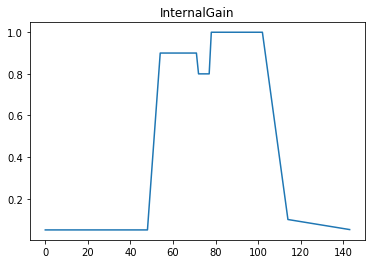

In [40]:
dataSetX_All,dataSetY_All = pre_Process(data_with_Timestamps_resampled,Weather_Data_resampled,TimeInterval,time_lags)

In [41]:
dataSetY_All.shape

(4322, 1)

In [42]:
dataSetX_All.shape

(4322, 26)

In [43]:
dataSetX_All.head()

,const,TSupCor.T,VSupCor_flow.V_flow,hist_1,hist_2,hist_3,hist_4,hist_5,hist_6,hist_12,...,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-02 00:00:00,1.0,322.4018,0.000913,295.0448,295.0764,295.1092,295.1447,295.1840,295.2259,295.5170,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:10:00,1.0,322.4869,0.000900,295.0139,295.0448,295.0764,295.1092,295.1447,295.1840,295.4592,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:20:00,1.0,322.5621,0.000903,294.9835,295.0139,295.0448,295.0764,295.1092,295.1447,295.4077,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:30:00,1.0,322.6290,0.000910,294.9528,294.9835,295.0139,295.0448,295.0764,295.1092,295.3602,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:40:00,1.0,322.6878,0.000858,294.9218,294.9528,294.9835,295.0139,295.0448,295.0764,295.3146,...,-3.9,-6.1,85,99000,0,0,237,0,0,0


In [44]:
dataSetX_All.tail()

,const,TSupCor.T,VSupCor_flow.V_flow,hist_1,hist_2,hist_3,hist_4,hist_5,hist_6,hist_12,...,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-31 23:30:00,1.0,316.4434,0.001170,295.3312,295.3752,295.4181,295.4578,295.4874,295.4981,295.718000,...,-5.8,-10.0,85,99700,0,0,254,0,0,0
1970-01-31 23:40:00,1.0,317.5547,0.001643,295.2871,295.3312,295.3752,295.4181,295.4578,295.4874,295.674091,...,-5.8,-10.0,85,99700,0,0,254,0,0,0
1970-01-31 23:50:00,1.0,317.2953,0.002462,295.2443,295.2871,295.3312,295.3752,295.4181,295.4578,295.632769,...,-5.8,-10.0,85,99700,0,0,254,0,0,0
1970-02-01 00:00:00,1.0,312.6101,0.002821,295.2005,295.2443,295.2871,295.3312,295.3752,295.4181,295.589636,...,-7.3,-12.0,70,99100,0,0,213,0,0,0
1970-02-01 00:10:00,1.0,310.4100,0.002643,295.1487,295.2005,295.2443,295.2871,295.3312,295.3752,295.548700,...,-7.3,-12.0,70,99100,0,0,213,0,0,0


In [45]:
dataSetY_All.tail()

,flo.temAirPer5.T
Time,
1970-01-31 23:30:00,295.2871
1970-01-31 23:40:00,295.2443
1970-01-31 23:50:00,295.2005
1970-02-01 00:00:00,295.1487
1970-02-01 00:10:00,295.1200


In [46]:
dataSetX_All.columns

Index(['const', 'TSupCor.T', 'VSupCor_flow.V_flow', 'hist_1', 'hist_2',
       'hist_3', 'hist_4', 'hist_5', 'hist_6', 'hist_12', 'hist_18', 'hist_36',
       'hist_72', 'hist_144', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}'],
      dtype='object')

In [47]:
## Visualization
featureSet = ['const', 'TSupEas.T', 'VSupEas_flow.V_flow', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}']
len(featureSet)

15

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2281: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


KeyError: 'TSupEas.T'

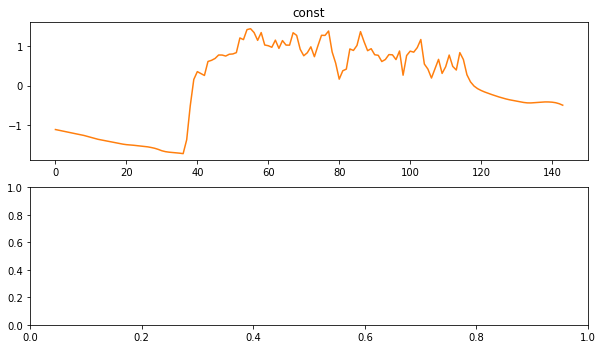

In [48]:
from scipy.stats import zscore
plt.figure(figsize = [10,45])
for i in range(len(featureSet)):
    plt.subplot(len(featureSet),1,i+1)
    plt.plot(zscore(dataSetX_All.loc[:,featureSet[i]].iloc[:144]))
    plt.plot(zscore(dataSetY_All.iloc[:144]))
    plt.title(featureSet[i])

##### feature elimination--colinearity removal

In [51]:
from scipy.stats import pearsonr

In [49]:
# The guidelines underlying this is: if the correlation coefficient of two variables are higher than threhold value, remove the one that is 
#  reletively irrelavant to Y
def Eliminate_Colinearity(dataSetX_All,datasetY_All,featureSet,threshold_For_Colinearity = 0.9):
    n = len(featureSet)

    feature_To_Remove_idx,feature_To_Remove = [],[]

    for i,feature in enumerate(featureSet):
        for j in range(i+1,n):
            coeff = pearsonr(dataSetX_All.loc[:,featureSet[i]],dataSetX_All.loc[:,featureSet[j]])[0]
            #print(coeff)
            if coeff: # if not nan
                if coeff >= threshold_For_Colinearity:

                    coef_i = pearsonr(dataSetX_All.loc[:,featureSet[i]].tolist(),dataSetY_All.iloc[:,0].tolist())[0]
                    coef_j = pearsonr(dataSetX_All.loc[:,featureSet[j]].tolist(),dataSetY_All.iloc[:,0].tolist())[0]

                    feature_To_Remove_idx.append(j) if  coef_i>= coef_j else feature_To_Remove_idx.append(i)
                    print(coeff,feature_To_Remove_idx)
                    #print(featureSet[i],featureSet[j],'\n')        
    feature_To_Remove_idx = list(set(feature_To_Remove_idx ))
    print(feature_To_Remove_idx)
    for idx in feature_To_Remove_idx:
        feature_To_Remove.append(featureSet[idx])
    return feature_To_Remove

In [52]:
featureSet = list(dataSetX_All.columns)
feature_To_Remove = Eliminate_Colinearity(dataSetX_All,dataSetY_All,featureSet)
featureSet_No_Colinear = featureSet.copy()
for feature in feature_To_Remove:  
    featureSet_No_Colinear.remove(feature)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


0.9744154409860426 [4]
0.9485272415237258 [4, 5]
0.9267592756067561 [4, 5, 6]
0.9047729533805994 [4, 5, 6, 7]
0.974416295422668 [4, 5, 6, 7, 5]
0.9485290800692424 [4, 5, 6, 7, 5, 6]
0.9267619667968525 [4, 5, 6, 7, 5, 6, 7]
0.9047765010905598 [4, 5, 6, 7, 5, 6, 7, 8]
0.9744172131955579 [4, 5, 6, 7, 5, 6, 7, 8, 6]
0.9485309659378302 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7]
0.926764682867927 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8]
0.9744181468666867 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7]
0.9485328599198756 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8]
0.9744190794004511 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8]
0.9530409884829162 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8, 17]
0.9220361128861491 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8, 17, 22]
0.9294576990085652 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8, 17, 22, 17]
0.9124136517902909 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8, 17, 22, 17, 23]
0.9289645152959554 [4, 5, 6, 7, 5, 6, 7, 8, 6, 7, 8, 7, 8, 8, 17, 22, 17, 23, 25]
[4, 5, 6, 7, 8, 17, 22, 23, 25]


In [160]:
featureSet_No_Colinear

['const',
 'TSupNor.T',
 'VSupNor_flow.V_flow',
 'hist_1',
 'hist_12',
 'hist_18',
 'hist_36',
 'hist_72',
 'hist_144',
 'occup',
 'Dry Bulb Temperature {C}',
 'Relative Humidity {%}',
 'Atmospheric Pressure {Pa}',
 'Extraterrestrial Horizontal Radiation {Wh/m2}',
 'Extraterrestrial Direct Normal Radiation {Wh/m2}',
 'Direct Normal Radiation {Wh/m2}',
 'Diffuse Horizontal Radiation {Wh/m2}']

##### Feature Selection
Here we will use wrapper method and implement both forward and backward Feature selection seperately

**Evaluation Metric**: R2_score on testing dataset

**Question:** Is it necessary to apply Cross-Validation

In [53]:
import statsmodels
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

**Evaluation metrics and prediction function**

In [54]:
featureSet_NoHist = ['const', 'TSupCor.T', 'VSupCor_flow.V_flow', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}']

In [55]:
# Split the data into training/testing sets
## Ratio of training sets to testing set: **5:1**

ratio = 1/5
splitting_Point = int(len(dataSetX_All)*4/5)
dataSetX_train, dataSetX_test = dataSetX_All.iloc[:splitting_Point,:],dataSetX_All.iloc[splitting_Point:,:]

dataSetY_train, dataSetY_test = dataSetY_All.iloc[:splitting_Point,:],dataSetY_All.iloc[splitting_Point:,:]

In [101]:
dataSetY_train.shape

(956, 1)

In [102]:
dataSetX_test.shape

(239, 26)

In [103]:
splitting_Point

956

In [56]:
## Evaluation Metrics
def Score(y,ypred, f = r2_score):
    score = f(y,ypred)
    print("Score:{:.4f}".format(score))
    return score

**Model Type: Multi-Variate Linear Regression**

In [57]:
from statsmodels.regression.linear_model import OLS

In [90]:
time_lags

[1, 2, 3, 4, 5, 6, 12, 18, 36, 72, 144]

In [112]:
a

,a
0,2


In [114]:
a.loc[:,"a"].iloc[0]=0

In [115]:
a

,a
0,0


In [124]:
def ModelPred_MLR(xTest_FullFeature, ytrain,featureSet,fmodel,time_lags = time_lags):  
    y_Sequence_Updated = ytrain.copy()
    xTest_FullFeature_copy = xTest_FullFeature.copy()
    for i in range(len(xTest_FullFeature)):
        # Append an empty value to the end of y_Sequence
        y_Sequence_Updated = y_Sequence_Updated.append(pd.DataFrame({y_Sequence_Updated.columns[0]:0},
                        columns = y_Sequence_Updated.columns,index =xTest_FullFeature.index[i:i+1] ))
       # print(y_Sequence_Updated.iloc[-2:,:])
        dataSetX_replacement = 0
        dataSetX_replacement = History_Record_Data(y_Sequence_Updated.iloc[-max(time_lags)-1:,:],time_lags)
        # Generat new train dataset based on the predict at current time
        # Set value 
        xTest_FullFeature_copy.iloc[i:i+1,:].loc[:,dataSetX_replacement.columns] = dataSetX_replacement.iloc[-1:,:]
        
        #Predict y_value at the next time step        
        y_Single = fmodel.predict(xTest_FullFeature_copy.loc[:,featureSet].iloc[i:i+1,:])
        y_Sequence_Updated.iloc[-1:,:]  = y_Single.iloc[:]
    
    return y_Sequence_Updated.iloc[-len(xTest_FullFeature):,:]

In [89]:
def ModelTrain_MLR(xtrain_FullFeature,ytrain,f_Set,seed = 0,time_lags = time_lags):
    timestart = time.time()
    # Create linear regression object
    #print(ytrain,xtrain_FullFeature.loc[:,f_Set])
    regr = OLS(ytrain,xtrain_FullFeature.loc[:,f_Set])
    #Fit model
    result_Model = regr.fit()    
    return result_Model

In [60]:
ypred = ModelPred_MLR(xtest,ytrain,f_Set,result_Model,time_lags = time_lags)
#print(ytest)
#int(ypred)
score = Score(ytest,ypred)
print("Time.{:.2f} seconds".format(time.time()-timestart))

NameError: name 'xtest' is not defined

In [61]:
def MLR(dataSetX_train,dataSetY_train,dataSetX_test,dataSetY_test,f_Set,seed = 0,paramodel = {}, time_lags = time_lags,prediction_Horizon = '6H',method = 1):
    n = int(TimeInterval_Parser(prediction_Horizon)/TimeInterval_Parser(TimeInterval))

    ## for this part, this is two ways to predict the Y value on the whole testing set

    # 1. Build a single model on the trainSet, and predict Y values for the next 6 hrs based on measured value  every time
    current_position, prev_Position = 0, 0
    t0 = time.time()
    
    if method == 1:
        print('training model')
        Model = ModelTrain_MLR(dataSetX_train,dataSetY_train,f_Set,seed=0,time_lags = time_lags)
        print('training completed====')
        while True:
            prev_Position,current_position  = current_position, current_position+n  # Move the pointer n steps forward
            if current_position <= len(dataSetY_test):
                ypred = ModelPred_MLR(dataSetX_test.iloc[prev_Position:current_position,:],
                                      dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),f_Set,Model,time_lags = time_lags)
                print("Time.{:.2f} seconds".format(time.time()-t0))
                if prev_Position == 0:
                    total_Res = ypred
                else:
                    total_Res = total_Res.append(ypred)
            else:
                ypred = ModelPred_MLR(dataSetX_test.iloc[prev_Position:,:],
                                      dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),f_Set,Model,time_lags = time_lags)
                print("Time.{:.2f} seconds".format(time.time()-t0))
                if prev_Position == 0:
                    total_Res = ypred
                else:
                    total_Res = total_Res.append(ypred)
                break
        # 2. Build a new model everytime, and predict Y values for the next 6 hrs based on measured value  every time
    elif method == 2:
        while True:
            prev_Position,current_position  = current_position, current_position+n  # Move the pointer n steps forward
            if current_position <= len(dataSetY_test):
                Model = ModelTrain_MLR(dataSetX_train.append(dataSetX_test.iloc[:prev_Position,:]),
                                       dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),f_Set,seed=0,time_lags = time_lags)                    
                ypred = ModelPred_MLR(dataSetX_test.iloc[prev_Position:current_position,:],
                                      dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),f_Set,Model,time_lags = time_lags)
                print("Time.{:.2f} seconds".format(time.time()-t0))
                if prev_Position == 0:
                    total_Res = ypred
                else:
                    total_Res = total_Res.append(ypred)
            else:
                Model = ModelTrain_MLR(dataSetX_train.append(dataSetX_test.iloc[:prev_Position,:]),
                                       dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),f_Set,seed=0,time_lags = time_lags)                    
                ypred = ModelPred_MLR(dataSetX_test.iloc[prev_Position:,:],
                                      dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),f_Set,Model,time_lags = time_lags)
                print("Time.{:.2f} seconds".format(time.time()-t0))
                if prev_Position == 0:
                    total_Res = ypred
                else:
                    total_Res = total_Res.append(ypred)
                break
    elif method == 3:
        print('1')


    ## Comparison between predicted value and real value
    plt.plot(total_Res)
    plt.plot(dataSetY_test.iloc[:,:])
    s = Score(total_Res,dataSetY_test)
    return total_Res,s

In [62]:
##Prediction horizon :3600
prediction_Horizon = '6H'

In [63]:
dataSetX_train

,const,TSupCor.T,VSupCor_flow.V_flow,hist_1,hist_2,hist_3,hist_4,hist_5,hist_6,hist_12,...,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-02 00:00:00,1.0,322.401800,0.000913,295.044800,295.076400,295.109200,295.144700,295.184000,295.225900,295.517000,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:10:00,1.0,322.486900,0.000900,295.013900,295.044800,295.076400,295.109200,295.144700,295.184000,295.459200,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:20:00,1.0,322.562100,0.000903,294.983500,295.013900,295.044800,295.076400,295.109200,295.144700,295.407700,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:30:00,1.0,322.629000,0.000910,294.952800,294.983500,295.013900,295.044800,295.076400,295.109200,295.360200,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:40:00,1.0,322.687800,0.000858,294.921800,294.952800,294.983500,295.013900,295.044800,295.076400,295.314600,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:50:00,1.0,322.733900,0.000726,294.889800,294.921800,294.952800,294.983500,295.013900,295.044800,295.270100,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 01:00:00,1.0,322.770400,0.000653,294.860800,294.889800,294.921800,294.952800,294.983500,295.013900,295.225900,...,-2.8,-6.1,78,99000,0,0,243,0,0,0
1970-01-02 01:10:00,1.0,322.801500,0.000649,294.834200,294.860800,294.889800,294.921800,294.952800,294.983500,295.184000,...,-2.8,-6.1,78,99000,0,0,243,0,0,0
1970-01-02 01:20:00,1.0,322.832300,0.000766,294.807100,294.834200,294.860800,294.889800,294.921800,294.952800,295.144700,...,-2.8,-6.1,78,99000,0,0,243,0,0,0


In [64]:
dataSetX_test

,const,TSupCor.T,VSupCor_flow.V_flow,hist_1,hist_2,hist_3,hist_4,hist_5,hist_6,hist_12,...,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-26 00:10:00,1.0,316.080600,0.001388,295.438900,295.447400,295.441700,295.464400,295.501600,295.545800,295.820100,...,-6.7,-11.1,71,99000,0,0,249,0,0,0
1970-01-26 00:20:00,1.0,317.251400,0.001334,295.408500,295.438900,295.447400,295.441700,295.464400,295.501600,295.785300,...,-6.7,-11.1,71,99000,0,0,249,0,0,0
1970-01-26 00:30:00,1.0,318.209300,0.001329,295.370600,295.408500,295.438900,295.447400,295.441700,295.464400,295.744300,...,-6.7,-11.1,71,99000,0,0,249,0,0,0
1970-01-26 00:40:00,1.0,319.018200,0.001357,295.326800,295.370600,295.408500,295.438900,295.447400,295.441700,295.697300,...,-6.7,-11.1,71,99000,0,0,249,0,0,0
1970-01-26 00:50:00,1.0,319.713600,0.001411,295.279100,295.326800,295.370600,295.408500,295.438900,295.447400,295.646200,...,-6.7,-11.1,71,99000,0,0,249,0,0,0
1970-01-26 01:00:00,1.0,320.316700,0.001488,295.229900,295.279100,295.326800,295.370600,295.408500,295.438900,295.594700,...,-6.7,-11.1,71,99000,0,0,249,0,0,0
1970-01-26 01:10:00,1.0,320.842000,0.001601,295.182200,295.229900,295.279100,295.326800,295.370600,295.408500,295.545800,...,-6.7,-11.1,71,99000,0,0,249,0,0,0
1970-01-26 01:20:00,1.0,321.312545,0.001919,295.139900,295.182200,295.229900,295.279100,295.326800,295.370600,295.501600,...,-6.7,-11.1,71,99000,0,0,249,0,0,0
1970-01-26 01:30:00,1.0,320.085091,0.002530,295.108727,295.139900,295.182200,295.229900,295.279100,295.326800,295.464400,...,-6.7,-11.1,71,99000,0,0,249,0,0,0


In [65]:
dataSetX_train.head()

,const,TSupCor.T,VSupCor_flow.V_flow,hist_1,hist_2,hist_3,hist_4,hist_5,hist_6,hist_12,...,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-02 00:00:00,1.0,322.4018,0.000913,295.0448,295.0764,295.1092,295.1447,295.1840,295.2259,295.5170,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:10:00,1.0,322.4869,0.000900,295.0139,295.0448,295.0764,295.1092,295.1447,295.1840,295.4592,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:20:00,1.0,322.5621,0.000903,294.9835,295.0139,295.0448,295.0764,295.1092,295.1447,295.4077,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:30:00,1.0,322.6290,0.000910,294.9528,294.9835,295.0139,295.0448,295.0764,295.1092,295.3602,...,-3.9,-6.1,85,99000,0,0,237,0,0,0
1970-01-02 00:40:00,1.0,322.6878,0.000858,294.9218,294.9528,294.9835,295.0139,295.0448,295.0764,295.3146,...,-3.9,-6.1,85,99000,0,0,237,0,0,0


training model
training completed====
Time.23.15 seconds
Time.46.34 seconds
Time.69.05 seconds
Time.91.78 seconds
Time.113.66 seconds
Time.136.47 seconds
Time.160.34 seconds
Time.184.11 seconds
Time.208.31 seconds
Time.230.94 seconds
Time.253.77 seconds
Time.277.18 seconds
Time.300.84 seconds
Time.324.06 seconds
Time.346.61 seconds
Time.369.12 seconds
Time.392.32 seconds
Time.415.87 seconds
Time.439.47 seconds
Time.462.52 seconds
Time.485.20 seconds
Time.508.77 seconds
Time.531.77 seconds
Time.555.19 seconds
Time.555.26 seconds
Score:0.7830


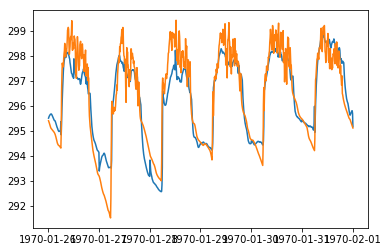

In [125]:
s = MLR(dataSetX_train,dataSetY_train,dataSetX_test,dataSetY_test,featureSet,seed = 0,paramodel = {}, time_lags = time_lags,prediction_Horizon = '6H',method = 1)

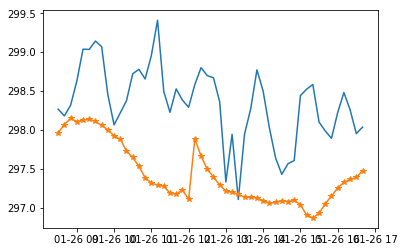

In [126]:
plt.plot(dataSetY_test.iloc[50:100,0])
plt.plot(s[0][50:100],'-*')

In [70]:
s[0]

,flo.temAirPer5.T
Time,
1970-01-26 00:10:00,295.513539
1970-01-26 00:20:00,295.472274
1970-01-26 00:30:00,295.450908
1970-01-26 00:40:00,295.409654
1970-01-26 00:50:00,295.381612
1970-01-26 01:00:00,295.340990
1970-01-26 01:10:00,295.298856
1970-01-26 01:20:00,295.266292
1970-01-26 01:30:00,295.236509


In [67]:
##CV-RMSE and NMBE
def CV_RMSE(y_pred,y_real,n,p):
    # y_pred: Np_array
    return (sum((y_pred-y_real)**2)/(n-p))**(1/2)
    
def NMBE(y_pred,y_real,n,p):
    return sum(y_real-y_pred)/(n-p)/(sum(y_real)/len(y_real))*100

In [68]:
CV_RMSE(np.array(s[0]),np.array(dataSetY_test),dataSetX_test.shape[0],dataSetX_test.shape[1]),NMBE(np.array(s[0]),np.array(dataSetY_test),dataSetX_test.shape[0],dataSetX_test.shape[1])

(array([0.35765232]), array([0.01212518]))

**Result: Clearly from the top chart, the model runs as I expected**

**Forward Feature Selection**

In [54]:
def anyHistData(featureSet):
    res = False
    for feature in featureSet:
        if feature[:4] == 'hist':
            res = True
            break
    return res        

In [55]:
## Forward Feature Selection
def forward_feature_selection(x_train, x_test, y_train, y_test, featureSet_Original):
    n = len(featureSet_Original)
    feature_set = []
    Scores = []
    for i,num_features in enumerate(range(n)):
        metric_list = [] # Choose appropriate metric based on business problem
        for j,feature in enumerate(featureSet_Original):
            if feature not in feature_set:
                f_set = feature_set.copy()
                f_set.append(feature)
                t_start = time.time()
                if anyHistData(f_set):
                    (ypred,s) =  MLR(x_train,  y_train,x_test, y_test,f_set,seed = 0,
                                paramodel = {}, time_lags = time_lags,prediction_Horizon = '6H',method = 1)
                else:
                    regr = OLS(dataSetY_train,dataSetX_train.loc[:,f_set])
                    #Fit model
                    result_Model = regr.fit()
                    ypred = result_Model.predict(dataSetX_test.loc[:,f_set])
                    s = Score(dataSetY_test,ypred)
                    
                metric_list.append((s, feature))
                print('=======',i,j)
                print(f_set)
                print('=-======',(s))
                print('time elapsed in this round:{:.4f}'.format(time.time()-t_start))

        metric_list.sort(key=lambda x : x[0], reverse = True) # In case metric follows "the more, the merrier"
        feature_set.append(metric_list[0][1])
        Scores.append((i,j,feature_set,metric_list[0][0]))
    return feature_set,Scores

Score:-0.3444
======= 0 0
['const']
=-====== -0.34441699530325387
time elapsed in this round:0.0050
Score:-59.4408
======= 0 1
['TSupCor.T']
=-====== -59.44084005273803
time elapsed in this round:0.0040
Score:-24412.4057
======= 0 2
['VSupCor_flow.V_flow']
=-====== -24412.405748936373
time elapsed in this round:0.0040
training model
training completed====
Time.0.22 seconds
Time.0.38 seconds
Time.0.55 seconds
Time.0.72 seconds
Time.0.89 seconds
Time.1.06 seconds
Time.1.22 seconds
Time.1.39 seconds
Time.1.48 seconds
Score:0.9507
======= 0 3
['hist_1']
=-====== 0.950728347944375
time elapsed in this round:1.4880
training model
training completed====
Time.0.19 seconds
Time.0.36 seconds
Time.0.53 seconds
Time.0.69 seconds
Time.0.87 seconds
Time.1.10 seconds
Time.1.31 seconds
Time.1.51 seconds
Time.1.62 seconds
Score:-1.2350
======= 0 4
['hist_36']
=-====== -1.2350477049575836
time elapsed in this round:1.6291
training model
training completed====
Time.0.19 seconds
Time.0.41 seconds
Time.0.5

Time.1.37 seconds
Time.1.55 seconds
Time.1.63 seconds
Score:0.9529
======= 2 7
['hist_1', 'VSupCor_flow.V_flow', 'InternalGain']
=-====== 0.9529110800159427
time elapsed in this round:1.6366
training model
training completed====
Time.0.20 seconds
Time.0.41 seconds
Time.0.60 seconds
Time.0.79 seconds
Time.0.99 seconds
Time.1.17 seconds
Time.1.34 seconds
Time.1.52 seconds
Time.1.60 seconds
Score:0.9527
======= 2 8
['hist_1', 'VSupCor_flow.V_flow', 'Dry Bulb Temperature {C}']
=-====== 0.9527458687744068
time elapsed in this round:1.6037
training model
training completed====
Time.0.22 seconds
Time.0.41 seconds
Time.0.61 seconds
Time.0.79 seconds
Time.1.02 seconds
Time.1.19 seconds
Time.1.37 seconds
Time.1.57 seconds
Time.1.66 seconds
Score:0.9525
======= 2 9
['hist_1', 'VSupCor_flow.V_flow', 'Relative Humidity {%}']
=-====== 0.9525357055859266
time elapsed in this round:1.6695
training model
training completed====
Time.0.22 seconds
Time.0.40 seconds
Time.0.59 seconds
Time.0.76 seconds
Time

Time.1.23 seconds
Time.1.42 seconds
Time.1.61 seconds
Time.1.70 seconds
Score:0.9552
======= 4 9
['hist_1', 'VSupCor_flow.V_flow', 'hist_72', 'TSupCor.T', 'Relative Humidity {%}']
=-====== 0.9552370308690277
time elapsed in this round:1.7064
training model
training completed====
Time.0.23 seconds
Time.0.43 seconds
Time.0.61 seconds
Time.0.78 seconds
Time.0.95 seconds
Time.1.14 seconds
Time.1.34 seconds
Time.1.53 seconds
Time.1.63 seconds
Score:0.9552
======= 4 10
['hist_1', 'VSupCor_flow.V_flow', 'hist_72', 'TSupCor.T', 'Atmospheric Pressure {Pa}']
=-====== 0.9551686971785529
time elapsed in this round:1.6306
training model
training completed====
Time.0.23 seconds
Time.0.43 seconds
Time.0.62 seconds
Time.0.82 seconds
Time.0.99 seconds
Time.1.17 seconds
Time.1.36 seconds
Time.1.53 seconds
Time.1.62 seconds
Score:0.9551
======= 4 11
['hist_1', 'VSupCor_flow.V_flow', 'hist_72', 'TSupCor.T', 'Extraterrestrial Horizontal Radiation {Wh/m2}']
=-====== 0.9550765151195035
time elapsed in this r

Time.1.31 seconds
Time.1.50 seconds
Time.1.59 seconds
Score:0.9550
======= 6 13
['hist_1', 'VSupCor_flow.V_flow', 'hist_72', 'TSupCor.T', 'occup', 'Relative Humidity {%}', 'Direct Normal Radiation {Wh/m2}']
=-====== 0.9550007621791635
time elapsed in this round:1.5977
training model
training completed====
Time.0.21 seconds
Time.0.44 seconds
Time.0.64 seconds
Time.0.85 seconds
Time.1.04 seconds
Time.1.24 seconds
Time.1.43 seconds
Time.1.61 seconds
Time.1.70 seconds
Score:0.9551
======= 7 0
['hist_1', 'VSupCor_flow.V_flow', 'hist_72', 'TSupCor.T', 'occup', 'Relative Humidity {%}', 'InternalGain', 'const']
=-====== 0.9550668357813751
time elapsed in this round:1.7024
training model
training completed====
Time.0.21 seconds
Time.0.39 seconds
Time.0.62 seconds
Time.0.82 seconds
Time.1.02 seconds
Time.1.25 seconds
Time.1.45 seconds
Time.1.65 seconds
Time.1.73 seconds
Score:0.9562
======= 7 4
['hist_1', 'VSupCor_flow.V_flow', 'hist_72', 'TSupCor.T', 'occup', 'Relative Humidity {%}', 'InternalG

Time.0.27 seconds
Time.0.52 seconds
Time.0.72 seconds
Time.0.90 seconds
Time.1.06 seconds
Time.1.24 seconds
Time.1.41 seconds
Time.1.58 seconds
Time.1.66 seconds
Score:0.9552
======= 10 0
['hist_1', 'VSupCor_flow.V_flow', 'hist_72', 'TSupCor.T', 'occup', 'Relative Humidity {%}', 'InternalGain', 'Atmospheric Pressure {Pa}', 'hist_36', 'Extraterrestrial Horizontal Radiation {Wh/m2}', 'const']
=-====== 0.9551593833875389
time elapsed in this round:1.6665
training model
training completed====
Time.0.24 seconds
Time.0.44 seconds
Time.0.65 seconds
Time.0.84 seconds
Time.1.03 seconds
Time.1.24 seconds
Time.1.43 seconds
Time.1.62 seconds
Time.1.73 seconds
Score:0.9557
======= 10 8
['hist_1', 'VSupCor_flow.V_flow', 'hist_72', 'TSupCor.T', 'occup', 'Relative Humidity {%}', 'InternalGain', 'Atmospheric Pressure {Pa}', 'hist_36', 'Extraterrestrial Horizontal Radiation {Wh/m2}', 'Dry Bulb Temperature {C}']
=-====== 0.955717233385972
time elapsed in this round:1.7304
training model
training complete

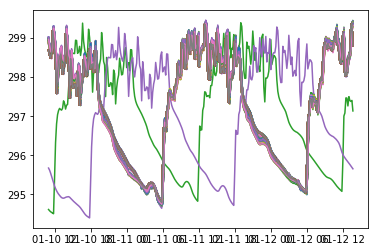

In [167]:
(feature_Set_r, scores) = forward_feature_selection(dataSetX_train,dataSetX_test,
                         dataSetY_train,dataSetY_test,featureSet_No_Colinear)

In [170]:
[(ele[0],ele[3])for ele in scores]

[(0, 0.950728347944375),
 (1, 0.9526877138979423),
 (2, 0.9544917398119468),
 (3, 0.9551805393036897),
 (4, 0.9559618642454804),
 (5, 0.956029767156355),
 (6, 0.9561990934597046),
 (7, 0.9563275781248362),
 (8, 0.95638600991589),
 (9, 0.9563695555762538),
 (10, 0.9561746337416149),
 (11, 0.9557229185259472),
 (12, 0.9549791483619711),
 (13, 0.954532646554158)]

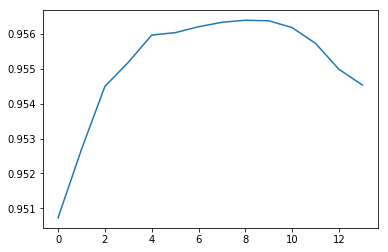

In [169]:
plt.plot(pd.DataFrame([(ele[0],ele[3])for ele in scores]).iloc[:,1])

In [171]:
scores[8]

(8,
 13,
 ['hist_1',
  'VSupCor_flow.V_flow',
  'hist_72',
  'TSupCor.T',
  'occup',
  'Relative Humidity {%}',
  'InternalGain',
  'Atmospheric Pressure {Pa}',
  'hist_36',
  'Extraterrestrial Horizontal Radiation {Wh/m2}',
  'Extraterrestrial Direct Normal Radiation {Wh/m2}',
  'Direct Normal Radiation {Wh/m2}',
  'const',
  'Dry Bulb Temperature {C}'],
 0.95638600991589)

In [83]:
print('{0:4}'.format(4.444))

4.444


##### test

In [172]:
feature_Set_re = scores[8][2]

In [ ]:
['hist_1',
 'VSupCor_flow.V_flow',
 'hist_72',
 'TSupCor.T',
 'occup',
 'Relative Humidity {%}',
 'InternalGain',
 'Atmospheric Pressure {Pa}',
 'hist_36',
 'Extraterrestrial Horizontal Radiation {Wh/m2}',
 'Extraterrestrial Direct Normal Radiation {Wh/m2}',
 'Direct Normal Radiation {Wh/m2}',
 'const',
 'Dry Bulb Temperature {C}']

In [173]:
feature_Set_re

['hist_1',
 'VSupCor_flow.V_flow',
 'hist_72',
 'TSupCor.T',
 'occup',
 'Relative Humidity {%}',
 'InternalGain',
 'Atmospheric Pressure {Pa}',
 'hist_36',
 'Extraterrestrial Horizontal Radiation {Wh/m2}',
 'Extraterrestrial Direct Normal Radiation {Wh/m2}',
 'Direct Normal Radiation {Wh/m2}',
 'const',
 'Dry Bulb Temperature {C}']

In [174]:
Model = ModelTrain_MLR(dataSetX_train,dataSetY_train,feature_Set_re,seed=0,time_lags = time_lags)
n = 36
current_position, prev_Position = 0, 0
t0 = time.time()
while True:
    prev_Position,current_position  = current_position, current_position+n  # Move the pointer n steps forward
    if current_position <= len(dataSetY_test):
        ypred = ModelPred_MLR(dataSetX_test.iloc[prev_Position:current_position,:],
                              dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),feature_Set_re,Model,time_lags = time_lags)
        print("Time.{:.2f} seconds".format(time.time()-t0))
        if prev_Position == 0:
            total_Res = ypred
        else:
            total_Res = total_Res.append(ypred)
    else:
        ypred = ModelPred_MLR(dataSetX_test.iloc[prev_Position:,:],
                              dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),feature_Set_re,Model,time_lags = time_lags)
        print("Time.{:.2f} seconds".format(time.time()-t0))
        if prev_Position == 0:
            total_Res = ypred
        else:
            total_Res = total_Res.append(ypred)
        break

Time.0.21 seconds
Time.0.38 seconds
Time.0.57 seconds
Time.0.76 seconds
Time.0.95 seconds
Time.1.13 seconds
Time.1.31 seconds
Time.1.50 seconds
Time.1.59 seconds


Score:0.9790
Score:0.9545


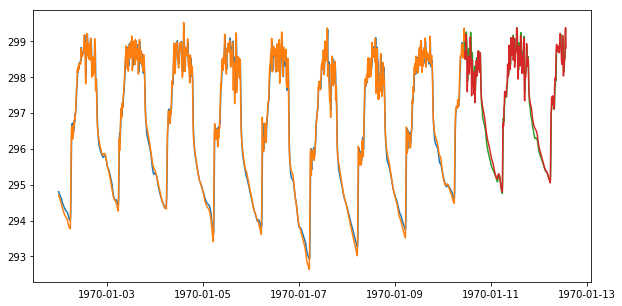

In [175]:
plt.figure(figsize = [10,5])
plt.plot(Model.predict(dataSetX_train.loc[:,feature_Set_re]))
plt.plot(dataSetY_train.iloc[:,:])
s = Score(Model.predict(dataSetX_train.loc[:,feature_Set_re]),dataSetY_train)

plt.plot(total_Res)
plt.plot(dataSetY_test.iloc[:,:])
s = Score(total_Res,dataSetY_test)

In [95]:
featureSet_NoHist

['const',
 'TSupCor.T',
 'VSupCor_flow.V_flow',
 'occup',
 'InternalGain',
 'Dry Bulb Temperature {C}',
 'Dew Point Temperature {C}',
 'Relative Humidity {%}',
 'Atmospheric Pressure {Pa}',
 'Extraterrestrial Horizontal Radiation {Wh/m2}',
 'Extraterrestrial Direct Normal Radiation {Wh/m2}',
 'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
 'Global Horizontal Radiation {Wh/m2}',
 'Direct Normal Radiation {Wh/m2}',
 'Diffuse Horizontal Radiation {Wh/m2}']

In [96]:
feature_Set_re = featureSet_NoHist

In [97]:
Model = ModelTrain_MLR(dataSetX_train,dataSetY_train,feature_Set_re,seed=0,time_lags = time_lags)
n = 36
current_position, prev_Position = 0, 0
t0 = time.time()
while True:
    prev_Position,current_position  = current_position, current_position+n  # Move the pointer n steps forward
    if current_position <= len(dataSetY_test):
        ypred = ModelPred_MLR(dataSetX_test.iloc[prev_Position:current_position,:],
                              dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),feature_Set_re,Model,time_lags = time_lags)
        print("Time.{:.2f} seconds".format(time.time()-t0))
        if prev_Position == 0:
            total_Res = ypred
        else:
            total_Res = total_Res.append(ypred)
    else:
        ypred = ModelPred_MLR(dataSetX_test.iloc[prev_Position:,:],
                              dataSetY_train.append(dataSetY_test.iloc[:prev_Position,:]),feature_Set_re,Model,time_lags = time_lags)
        print("Time.{:.2f} seconds".format(time.time()-t0))
        if prev_Position == 0:
            total_Res = ypred
        else:
            total_Res = total_Res.append(ypred)
        break

Time.0.18 seconds
Time.0.33 seconds
Time.0.48 seconds
Time.0.64 seconds
Time.0.80 seconds
Time.0.95 seconds
Time.1.11 seconds
Time.1.26 seconds
Time.1.41 seconds
Time.1.57 seconds
Time.1.72 seconds
Time.1.87 seconds
Time.2.04 seconds
Time.2.19 seconds
Time.2.35 seconds
Time.2.50 seconds
Time.2.66 seconds
Time.2.74 seconds


Score:0.8107
Score:0.8090


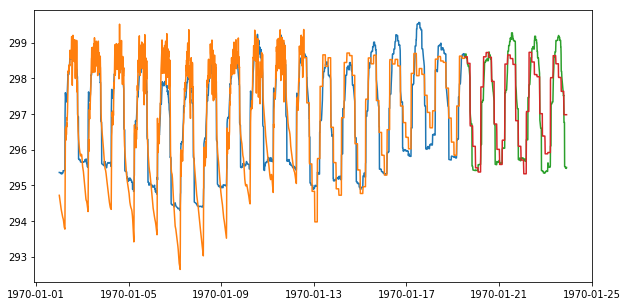

In [98]:
plt.figure(figsize = [10,5])
plt.plot(Model.predict(dataSetX_train.loc[:,feature_Set_re]))
plt.plot(dataSetY_train.iloc[:,:])
s = Score(Model.predict(dataSetX_train.loc[:,feature_Set_re]),dataSetY_train)

plt.plot(total_Res)
plt.plot(dataSetY_test.iloc[:,:])
s = Score(total_Res,dataSetY_test)

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>